In [32]:
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
root_directory = '/media/ish/Fuga/Genome_Project/data'
for dirname,_,filenames in os.walk(root_directory):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/media/ish/Fuga/Genome_Project/data/dog.txt
/media/ish/Fuga/Genome_Project/data/chimpanzee.txt
/media/ish/Fuga/Genome_Project/data/human.txt


### Testing kmers function

In [8]:
def kmers_funct(seq,size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size+1)]

test_seq = "GTGCCCAGGTTAGTCGATAGCTCGATCG"
kmers_funct(test_seq,size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggtta',
 'aggttag',
 'ggttagt',
 'gttagtc',
 'ttagtcg',
 'tagtcga',
 'agtcgat',
 'gtcgata',
 'tcgatag',
 'cgatagc',
 'gatagct',
 'atagctc',
 'tagctcg',
 'agctcga',
 'gctcgat',
 'ctcgatc',
 'tcgatcg']

In [9]:
words  = kmers_funct(test_seq, 6)
sentence = ' '.join(words)
sentence


'gtgccc tgccca gcccag cccagg ccaggt caggtt aggtta ggttag gttagt ttagtc tagtcg agtcga gtcgat tcgata cgatag gatagc atagct tagctc agctcg gctcga ctcgat tcgatc cgatcg'

In [10]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(kmers_funct(mySeq2, size=6))
joined_sentence = sentence1 + ' ' + sentence2

In [11]:
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1,sentence2]).toarray()
X

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]])

### Gene Famly and It's Class Labels

| Gene Family | Class Label |
|---|---|
| G protein-coupled receptors | 0 |
| Tyrosine kinase | 1 |
| Tyrosine phosphatase | 2 |
| Synthetase | 3 |
| Synthetase | 4 |
| Ion channel | 5 |
| Transcription factor | 6 |

In [12]:
homo_dna = pd.read_table("data/human.txt")
homo_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


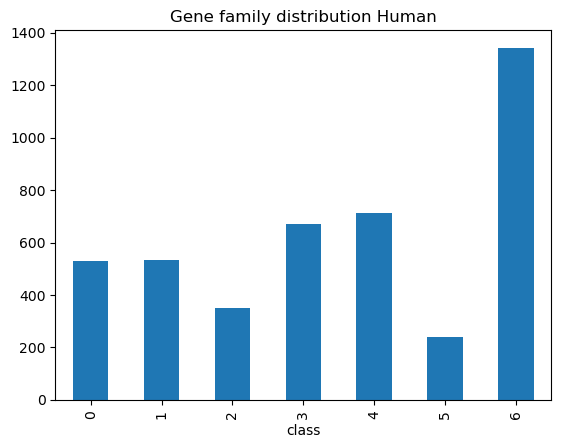

In [13]:
homo_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Gene family distribution Human")
plt.show()

In [14]:
#chimp dna
chimp_dna = pd.read_table('data/chimpanzee.txt')
chimp_dna.tail()

,sequence,class
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3
1681,ATGTTGCCCAGCTGTGGCAAGATCTTGACTGGGTGTAAGAATATGC...,3


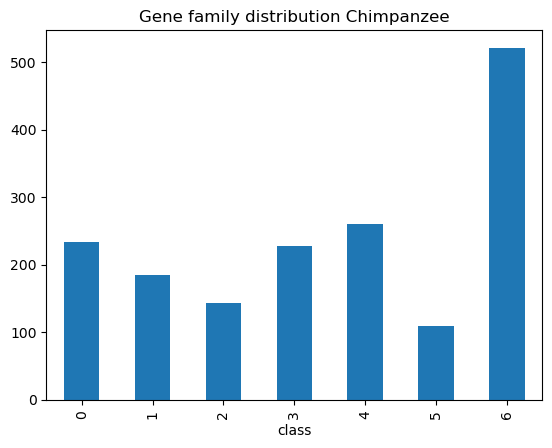

In [15]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Gene family distribution Chimpanzee")
plt.show()

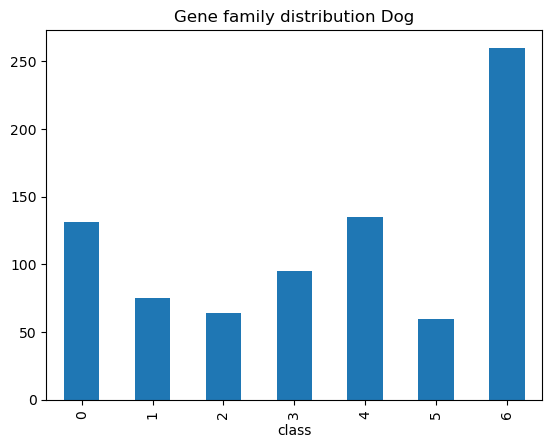

In [16]:
# Dog dna
#chimp dna
dog_dna = pd.read_table('data/dog.txt')
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Gene family distribution Dog")
plt.show()

In [17]:
homo_dna['words'] = homo_dna.apply(lambda x: kmers_funct(x['sequence'],size=6),axis=1)

In [18]:
homo_dna = homo_dna.drop('sequence',axis=1)

In [19]:
chimp_dna['words'] = chimp_dna.apply(lambda x: kmers_funct(x['sequence'],6), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: kmers_funct(x['sequence'],6), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [20]:
homo_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [21]:
homo_texts = list(homo_dna.words)

for i in range(len(homo_texts)):
    homo_texts[i] = ' '.join(homo_texts[i])
y_homo = homo_dna.iloc[:,0].values

In [22]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values 

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])

y_dog = dog_dna.iloc[:, 0].values

In [23]:
y_homo

array([4, 4, 3, ..., 6, 6, 6])

In [24]:



cv = CountVectorizer(ngram_range=(4, 4))
X = cv.fit_transform(homo_texts)  # Fit and transform the training data

# Use transform() for other datasets
X_chimp = cv.transform(chimp_texts)  # Transform chimp_texts using the same vocabulary
X_dog = cv.transform(dog_texts)      # Transform dog_texts using the same vocabulary



In [25]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


In [26]:


X_train, X_test, y_train, y_test = train_test_split(X,y_homo,test_size=0.2,random_state=100)


In [27]:

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:

print('Confusion matrix human test DNA seq\n')
print(pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_pred,name="Predicted")))
def metrics(y_test, y_prediction):
    accuracy = accuracy_score(y_test,y_prediction)
    precision = precision_score(y_test,y_prediction, average="weighted")
    recall = recall_score(y_test, y_prediction, average='weighted')
    f1 = f1_score(y_test, y_prediction, average='weighted')

    return accuracy, precision, recall, f1
accuracy, precision, recall, f1_score = metrics(y_test, y_pred)

print(" accuracy = %.3f\n precision = %.3f\n recall = %.3f\n f1 = %.3f"%(accuracy,precision,recall,f1_score))

Confusion matrix human test DNA seq

Predicted   0    1   2    3    4   5    6
Actual                                   
0          94    0   0    0    0   0    0
1           0  117   0    0    0   0    3
2           1    0  77    0    1   0    1
3           0    0   0  139    0   0    2
4           3    0   0    0  116   0    4
5           2    0   0    0    0  44    1
6           1    0   0    0    0   0  270
 accuracy = 0.978
 precision = 0.979
 recall = 0.978
 f1 = 0.978


In [30]:
# model performace on other species 
y_pred_chimp = classifier.predict(X_chimp)

In [33]:
print("Confusion Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          234    0    0    0    0    0    0
1            0  184    0    0    0    0    1
2            0    0  143    0    1    0    0
3            0    0    0  221    1    0    6
4            2    0    0    0  256    0    3
5            1    0    0    0    0  108    0
6            2    0    0    0    0    0  519
accuracy = 0.990 
precision = 0.990 
recall = 0.990 
f1 = 0.990


In [92]:
y_pred_dog = classifier.predict(X_dog)

In [93]:
print("Confusion matrix Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          128   0   0   0    0   0    3
1            1  64   0   0    0   0   10
2            1   0  49   0    1   0   13
3            3   0   0  80    1   0   11
4            2   0   0   1  129   0    3
5            4   0   0   0    1  53    2
6            1   0   0   0    0   0  259
accuracy = 0.929 
precision = 0.937 
recall = 0.929 
f1 = 0.929


### Key Hypothesis:

The project assumes that machine learning models can capture evolutionary relationships by identifying conserved genetic patterns. For example:

- A model trained on Homo sapiens DNA will classify chimpanzee sequences better than dog sequences due to the closer evolutionary proximity between humans and chimpanzees.
